# IIBM Bootcamp 2025: Day 5 Afternoon

### Instructors Carlos Valle (cgvalle@uc.cl) and Nicolás Garrido (nagarrido@uc.cl)


This jupyter notebook will cover linear equations and basics solvers in Python 

Content of the day:
* Fourier
* Filtering in the frequency space


# The Fourier Transform

The Fourier Transform is probably one of the most important mathematical operations of all time. In a few words, **it decomposes signals into a set of frequencyes that compose the original signal**.

The logic is that any signal can be written as an infinitue sum of sines and cosines of varying amplitude and phase. The Fourier transform is a process though which you can find such values for each frequency in this infinite sum.

![](https://raw.githubusercontent.com/CarlosValleA/IIBM-BootCamp-2023/main/assets/D5/fourier_integral.png)

There is a whole course at the UC dedicated to understing the mathematics behind this mathematical transform, so we will only focus on why is so usefull. 

We can obtain the cos and sin from :

<center>
$e^{ix} = cos(x) + i sin(x)$
</center>
    
    
### Practical exercise

Let's go with a practical example and open [Online spectrogram](https://spectrogram.sciencemusic.org/). A spectrogram is just doing the fourier transform multiple times and appending the results on time.
![](https://raw.githubusercontent.com/cgvalle/IIBM-BootCamp-2024/main/assets/D5/spectrogram.png)


* Whistle and watch the evolution of the frequencyes.
* In pairs Whistle at the same time 
* Try playing a song.
* Can we remove some frequencyes if we wanted ? 


# Fourier Inversion theorem
![](https://raw.githubusercontent.com/cgvalle/IIBM-BootCamp-2024/main/assets/D5/domain.png)

We can go from the time tomain to the frequency domain an vice-versa!!!. 

Let's try to implement it on Python. We will create a signal with a sampling rate of 2000 Hz, a duration of 10 seconds with a two hz signal

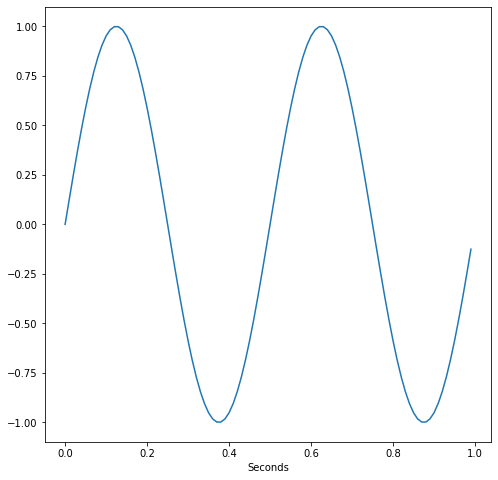

In [41]:
import numpy as np 
from matplotlib import pyplot as plt

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

sample_rate = 100
duration = 1
x, y1 = generate_sine_wave(2, sample_rate, duration)
x, y2 = generate_sine_wave(8, sample_rate, duration)


y = y1 
fig  = plt.figure(figsize=(8,8))
plt.plot(x, y)
plt.xlabel('Seconds')
plt.show()

[](https://raw.githubusercontent.com/CarlosValleA/IIBM-BootCamp-2023/main/assets/D5/domain.png)

### Getting the Fourier transform

/var/folders/f3/_vndswkd7m77x4fch48gl1sr0000gn/T/ipykernel_7666/1158980460.py:12: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(X), 'b', \
/Users/carlos/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


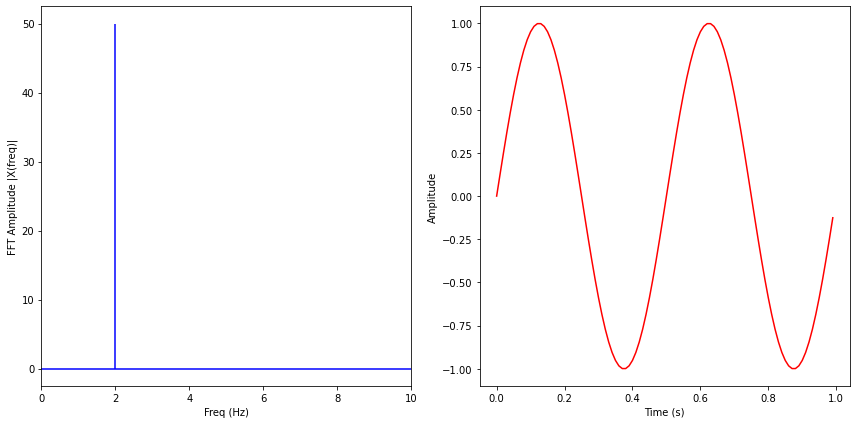

In [42]:
from numpy.fft import fft, ifft

X = fft(y)
N = len(X)
n = np.arange(N)
T = N/sample_rate
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(x, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Working with images

With can also observe at the frequency space with images. Since images have two dimensions, the frequency space will also have two dimensions. Instead of `fft` and `ifft` functions, we will use `fft2` and `ifft2` that can operate on images.

In [1]:
!curl -O https://raw.githubusercontent.com/cgvalle/IIBM-BootCamp-2024/main/assets/D5/lena.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    14  100    14    0     0     39      0 --:--:-- --:--:-- --:--:--    39


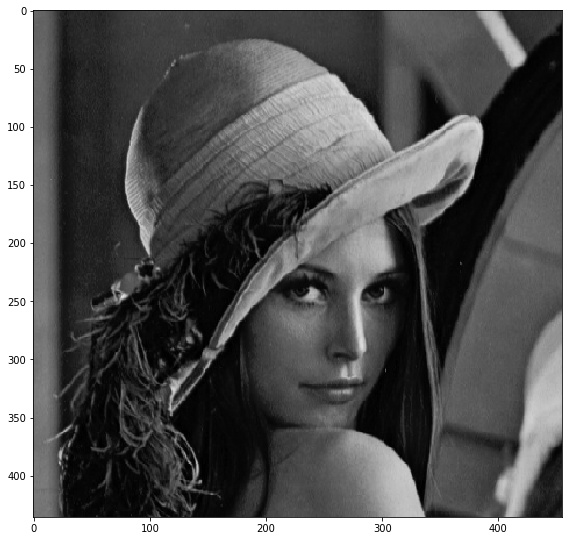

Image as a shape of  (436, 455)


In [44]:
# New libraries !
from skimage.io import imread, imshow
from matplotlib import pyplot as plt

lena = imread('lena.png')[:, :, 0]  # Only get one color channel
fig = plt.figure(figsize=(8,8))
imshow(lena)
plt.show()

# Shape
print("Image as a shape of ", lena.shape)


Now let's compute the image in the frequency space. 

`fft2` $\rightarrow$ Fourier Transform 2D

`fftshift` $\rightarrow$ Shift the zero-frequency component to the center of the spectrum.



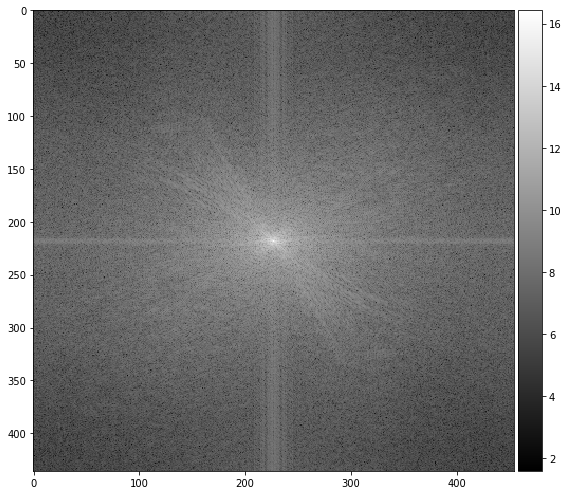

In [45]:
X = np.fft.fftshift(np.fft.fft2(lena)) 
fig = plt.figure(figsize=(8,8))
imshow(np.log(np.abs(X)), cmap='gray')
plt.show()

Reconstructed lena image from `X`. Low frequencies are located at the center of the image while high ones at the outside of the image.

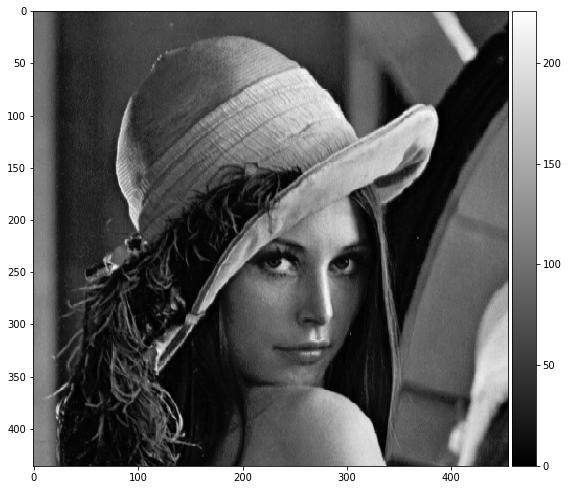

In [46]:
reconstructed = np.abs(np.fft.ifft2(np.fft.fftshift(X)))
fig = plt.figure(figsize=(8,8))
imshow(reconstructed, cmap='gray')
plt.show()


## The Fourier Inversion theorem is True !
We can modify the image in the frequency space to get interesting results. Let's apply a mask!:

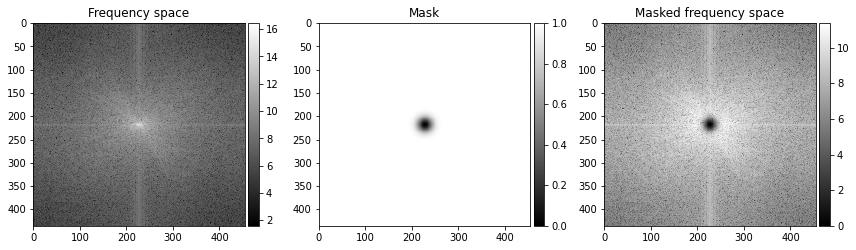

In [50]:
def gaus_mask(size, sigma_x, sigma_y, x, y):
    x = np.linspace(-10 - x, 10 - x, size[1])
    y = np.linspace(-10 + y, 10 + y, size[0])

    x, y = np.meshgrid(x, y)
    z = (1/(2*np.pi*sigma_x*sigma_y) * np.exp(-(x**2/(2*sigma_x**2)
         + y**2/(2*sigma_y**2))))
    return (z - np.min(z))/(np.max(z) - np.min(z))



mask = 1 - gaus_mask(lena.shape, sigma_x=0.5, sigma_y=0.5, x=0 ,y=0 )

fig = plt.figure(figsize=(12,10))
ax=plt.subplot(1,3,1)
imshow(np.log(np.abs(X)), cmap='gray')
ax.title.set_text("Frequency space")
ax=plt.subplot(1,3,2)
imshow(mask, cmap='gray')
ax.title.set_text("Mask")
ax=plt.subplot(1,3,3)
imshow(mask*np.log(np.abs(X)), cmap='gray')
ax.title.set_text("Masked frequency space")
plt.show()

Reconstructing the filtered image

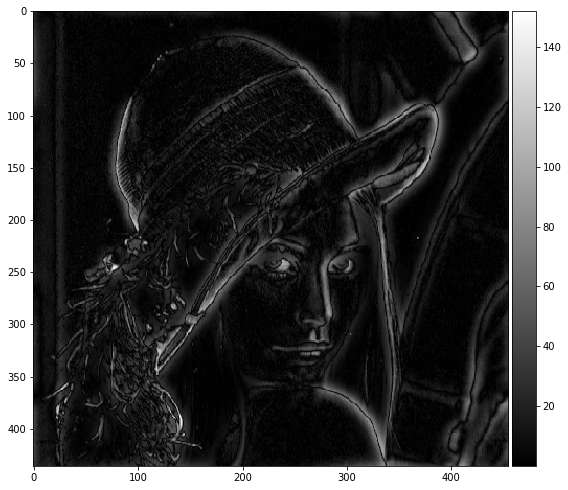

In [51]:
reconstructed = np.abs(np.fft.ifft2(np.fft.fftshift(X*mask)))
fig = plt.figure(figsize=(8,8))
imshow(reconstructed, cmap='gray')
plt.show()

We can do the same with a sobel convolution filter. so what ? . Fourier can delete more dificult noise!

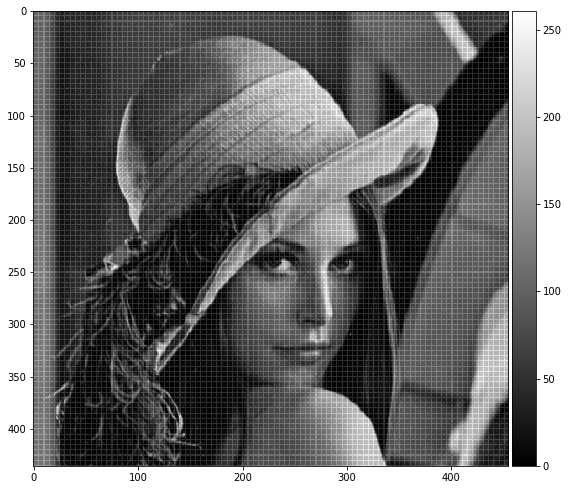

In [12]:
grid = np.zeros(lena.shape)

grid[:, ::5] = 40
grid[::5, :] = 40

lena_grid = grid + lena.copy()

fig = plt.figure(figsize=(8,8))
imshow(lena_grid, cmap='gray')
plt.show()

Comparing the original frequency space vs the lena with a grid

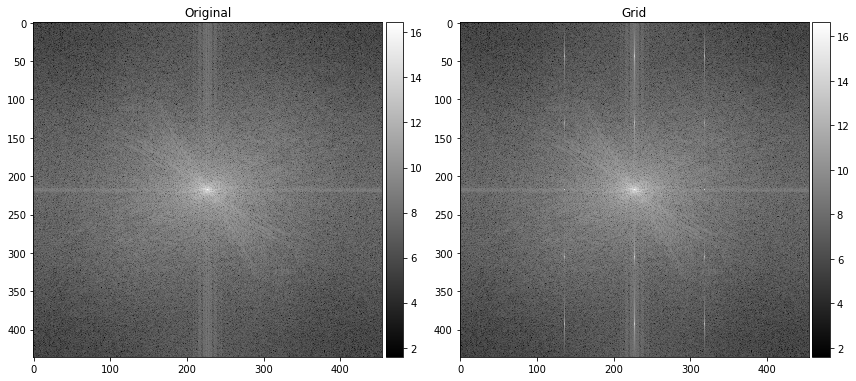

In [53]:
X_grid = np.fft.fftshift(np.fft.fft2(lena_grid)) 

fig = plt.figure(figsize=(12,10))
ax=plt.subplot(1,2,1)
imshow(np.log(np.abs(X)), cmap='gray')
ax.title.set_text("Original")
ax=plt.subplot(1,2,2)
imshow(np.log(np.abs(X_grid)), cmap='gray')
ax.title.set_text("Grid")
plt.show()

Let's try to remove the high frequency noises

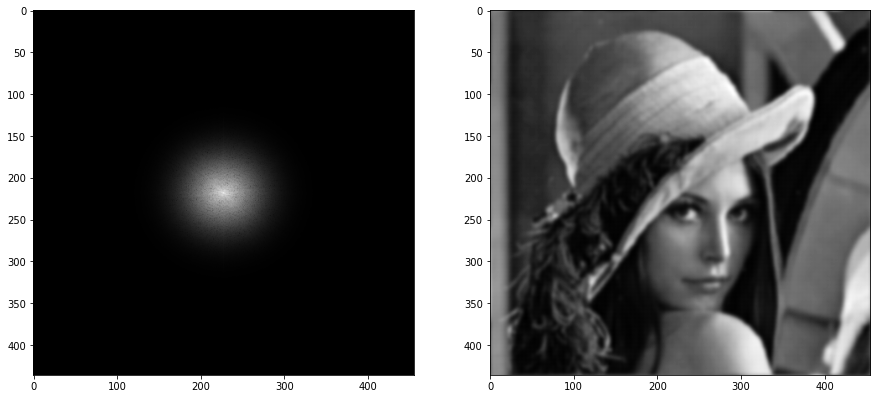

In [54]:
mask = gaus_mask(lena.shape, sigma_x=1.5, sigma_y=1.5, x=0 ,y=0 )


reconstructed = np.abs(np.fft.ifft2(np.fft.fftshift(X_grid*mask)))

fig = plt.figure(figsize=(15, 15))
plt.subplot(1,2,1)
plt.imshow(np.log(np.abs(X_grid))*mask, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(reconstructed, cmap='gray')
plt.show()


# Exercise 1.1
Download the image that is on the frequency domain and transform it to the space domain. **HINT: use the inverse Fourier transform**.

Create a plot with the image in the frequency domain and in the space domain

In [2]:
!curl -O https://raw.githubusercontent.com/cgvalle/IIBM-BootCamp-2024/main/assets/D5/X.npy

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    14  100    14    0     0     48      0 --:--:-- --:--:-- --:--:--    49


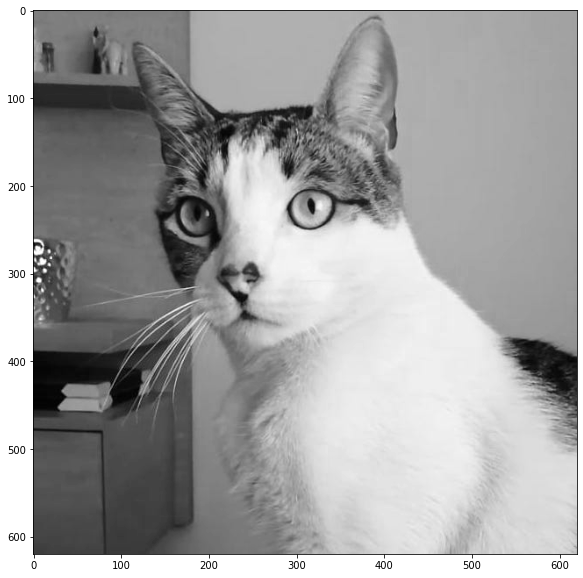

In [56]:
# Loading the image
X = np.load('X.npy')

reconstructed = np.abs(np.fft.ifft2(np.fft.fftshift(X)))

fig = plt.figure(figsize=(10,10))
plt.imshow(np.abs(reconstructed), cmap='gray')
plt.show()


# Exercise 1.2
Apply a circular filter mask (rect function in 2D) to the frequency domain image and reconstruct the image. Comment what you see


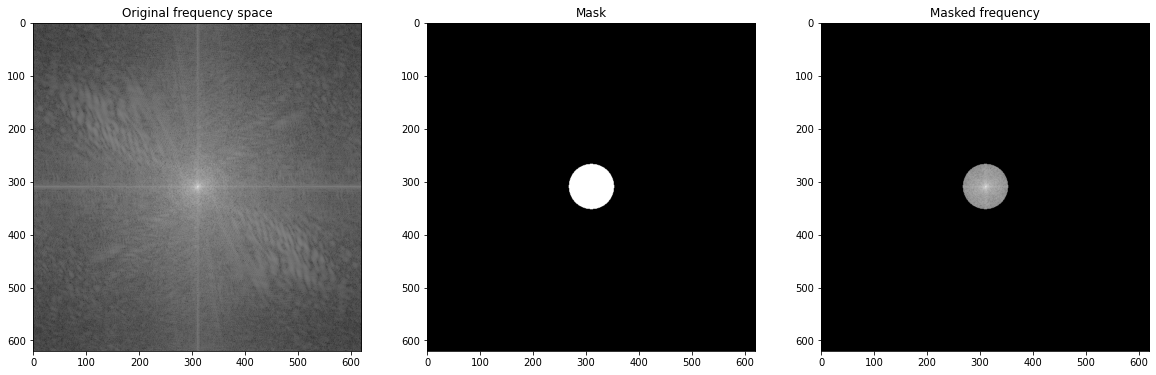

In [57]:
circular_mask = 1*(gaus_mask(reconstructed.shape, sigma_x=3, sigma_y=3, x=0 ,y=0 ) > 0.9)

fig = plt.figure(figsize=(20, 20))

ax = plt.subplot(1,3,1)
ax.imshow(np.log(np.abs(X)), cmap='gray')
ax.title.set_text('Original frequency space')

ax = plt.subplot(1,3,2)
ax.imshow(circular_mask, cmap='gray')
ax.title.set_text('Mask')

ax = plt.subplot(1,3,3)
ax.imshow(np.log(np.abs(X)) * circular_mask, cmap='gray')
ax.title.set_text('Masked frequency')

plt.show()


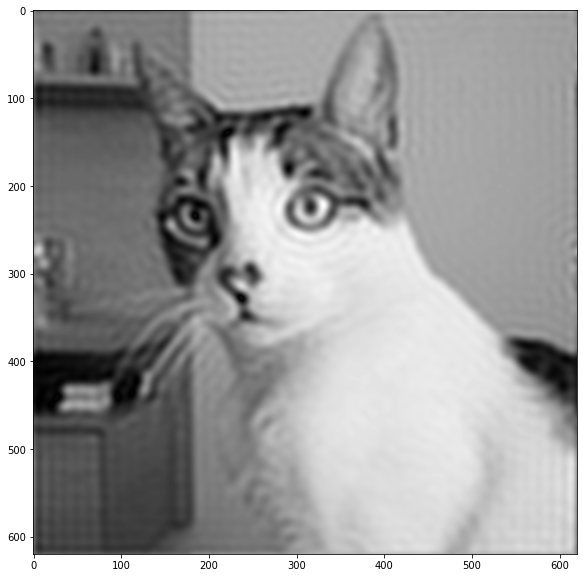

In [58]:
# Applying the mask to the image.  
reconstructed_masked = np.abs(np.fft.ifft2(np.fft.fftshift(X*circular_mask)))

fig = plt.figure(figsize=(10,10))
plt.imshow(np.abs(reconstructed_masked), cmap='gray')
plt.show()


Sharp filters create noise! ([Gibbs_phenomenon](https://en.wikipedia.org/wiki/Gibbs_phenomenon)). We should always prefer soft filters like the gaussian mask.

# Matlab
Repeate the same analysis on Matlab. With the command below download the data:

```R
url = "https://github.com/cgvalle/IIBM-BootCamp-2024/raw/main/assets/D5/X.mat"
websave('X.mat', url)
```


```
clc
clear
close all

% Loading data
X = load("X.mat");
X = X.a;


% Exercise 1.1
reconstructed = ifft2(fftshift(X));

figure
% Uint8 is necessary to define images fro imshow
imshow(uint8(reconstructed))  


% Exercise 1.2

circular_mask = gauss_mask([620, 620], 3, 3, 0 , 0) > 0.9 ;


figure
subplot(1,3,1)
imshow(log(abs(X))/20)
title('Frequency space')

subplot(1,3,2)
imshow(circular_mask)
title('Mask')

subplot(1,3,3)
imshow(log(abs(X.*circular_mask))/20)
title('Masked frequency space')


% reconstructed image
reconstructed_masked = ifft2(fftshift(X.*circular_mask));
figure
imshow(uint8(reconstructed_masked))




function mask = gauss_mask(size, sigma_x, sigma_y, pos_x, pos_y)
    whos 
    X = linspace(-10 - pos_x, 10 - pos_x, size(2));
    Y = linspace(-10 + pos_y, 10 + pos_y, size(1));

    [x, y] = meshgrid(X, Y);
    
    z = (1/(2*pi*sigma_x * sigma_y) * exp(-((x.^2./(2*sigma_x^2)) + (y.^2/(2*sigma_y^2)))));
    mask = (z - min(z(:)))./(max(z(:)) - min(z(:))) ;
  
end
```